# Model For Livability

## Import Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import io
from sklearn import tree

In [2]:
livability_data = pd.read_csv('Livability_Dataset.csv')


In [3]:
display(livability_data.head())
display(livability_data.info())
display(livability_data.describe())

,Neighboorhood,Income,Food_Stamp,Population,Percent_White,Percent_African_American,Percent_Hispanic,Percent_Asian,Amenities_Score,Cost_of_Living,Crime_Score,Employment_Score,Housing_Score,School_Score,Livability
0,UNIVERSITY OF TEXAS,7.0,5.3,7246,0.448109,0.064035,0.232128,0.222192,91.5,48.0,72.0,57.0,48.0,91.5,74
1,WEST UNIVERSITY,10.6,3.3,16408,0.627438,0.019381,0.130912,0.192650,91.5,78.0,57.0,48.0,48.0,81.0,76
2,NORTH UNIVERSITY,24.6,2.2,4791,0.721144,0.013358,0.129618,0.109580,91.5,60.0,72.0,52.5,66.0,91.5,70
3,PLEASANT VALLEY,26.6,13.5,12618,0.279759,0.135996,0.485893,0.080203,91.5,78.0,48.0,48.0,69.0,60.0,76
4,MONTOPOLIS,29.0,24.4,10638,0.093063,0.095883,0.793476,0.007238,91.5,75.0,48.0,48.0,60.0,69.0,70


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
Neighboorhood               50 non-null object
Income                      50 non-null float64
Food_Stamp                  50 non-null float64
Population                  50 non-null int64
Percent_White               50 non-null float64
Percent_African_American    50 non-null float64
Percent_Hispanic            50 non-null float64
Percent_Asian               50 non-null float64
Amenities_Score             50 non-null float64
Cost_of_Living              50 non-null float64
Crime_Score                 50 non-null float64
Employment_Score            50 non-null float64
Housing_Score               50 non-null float64
School_Score                50 non-null float64
Livability                  50 non-null int64
dtypes: float64(12), int64(2), object(1)
memory usage: 6.0+ KB


None

,Income,Food_Stamp,Population,Percent_White,Percent_African_American,Percent_Hispanic,Percent_Asian,Amenities_Score,Cost_of_Living,Crime_Score,Employment_Score,Housing_Score,School_Score,Livability
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,53.756000,12.588000,6572.200000,0.475347,0.086502,0.373824,0.043219,91.290000,57.600000,55.020000,60.960000,55.570000,77.760000,72.600000
std,21.623977,10.280964,4676.076648,0.249178,0.096700,0.230295,0.051645,1.484924,9.985193,10.968861,9.824916,8.443697,12.444669,5.225526
min,7.000000,0.400000,1121.000000,0.079104,0.003350,0.054606,0.004244,81.000000,48.000000,48.000000,48.000000,48.000000,48.000000,65.000000
25%,41.825000,3.425000,4023.500000,0.242808,0.025096,0.146551,0.014530,91.500000,48.000000,48.000000,53.000000,48.000000,69.000000,69.000000
50%,51.900000,9.550000,5320.500000,0.491684,0.049072,0.366790,0.024428,91.500000,55.000000,48.000000,60.000000,52.500000,78.000000,72.000000
75%,61.575000,21.550000,7446.250000,0.711476,0.103551,0.531518,0.039263,91.500000,66.000000,59.250000,66.000000,60.000000,91.500000,75.000000
max,123.100000,40.200000,27911.000000,0.908543,0.459437,0.827790,0.222192,91.500000,78.000000,91.500000,91.500000,75.000000,91.500000,86.000000


## Normalize Data

In [4]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

livability_features = livability_data.drop("Livability",axis=1)
livability_features = livability_features.drop("Neighboorhood",axis=1)
livability_target = livability_data[["Livability"]]

scaler.fit(livability_features)
livability_feature_scaler = scaler.transform(livability_features)
livability_feature_scaler = pd.DataFrame(livability_feature_scaler, index=livability_features.index, columns=livability_features.columns)

display(livability_feature_scaler.info())
display(livability_feature_scaler.head())
display(livability_target.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
Income                      50 non-null float64
Food_Stamp                  50 non-null float64
Population                  50 non-null float64
Percent_White               50 non-null float64
Percent_African_American    50 non-null float64
Percent_Hispanic            50 non-null float64
Percent_Asian               50 non-null float64
Amenities_Score             50 non-null float64
Cost_of_Living              50 non-null float64
Crime_Score                 50 non-null float64
Employment_Score            50 non-null float64
Housing_Score               50 non-null float64
School_Score                50 non-null float64
dtypes: float64(13)
memory usage: 5.2 KB


None

,Income,Food_Stamp,Population,Percent_White,Percent_African_American,Percent_Hispanic,Percent_Asian,Amenities_Score,Cost_of_Living,Crime_Score,Employment_Score,Housing_Score,School_Score
0,-2.184182,-0.716080,0.145558,-0.110419,-0.234692,-0.621527,3.500630,0.142857,-0.971184,1.563735,-0.407149,-0.905629,1.115296
1,-2.016009,-0.912589,2.124785,0.616569,-0.701167,-1.065496,2.922808,0.142857,2.063767,0.182344,-1.332487,-0.905629,0.262996
2,-1.362007,-1.020669,-0.384785,0.996448,-0.764079,-1.071171,1.298003,0.142857,0.242796,1.563735,-0.869818,1.247782,1.115296
3,-1.268578,0.089608,1.306048,-0.792901,0.517033,0.491575,0.723390,0.142857,2.063767,-0.646491,-1.332487,1.606683,-1.441606
4,-1.156463,1.160584,0.878317,-1.549758,0.097995,1.840740,-0.703769,0.142857,1.760272,-0.646491,-1.332487,0.529978,-0.711062


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
Livability    50 non-null int64
dtypes: int64(1)
memory usage: 528.0 bytes


None

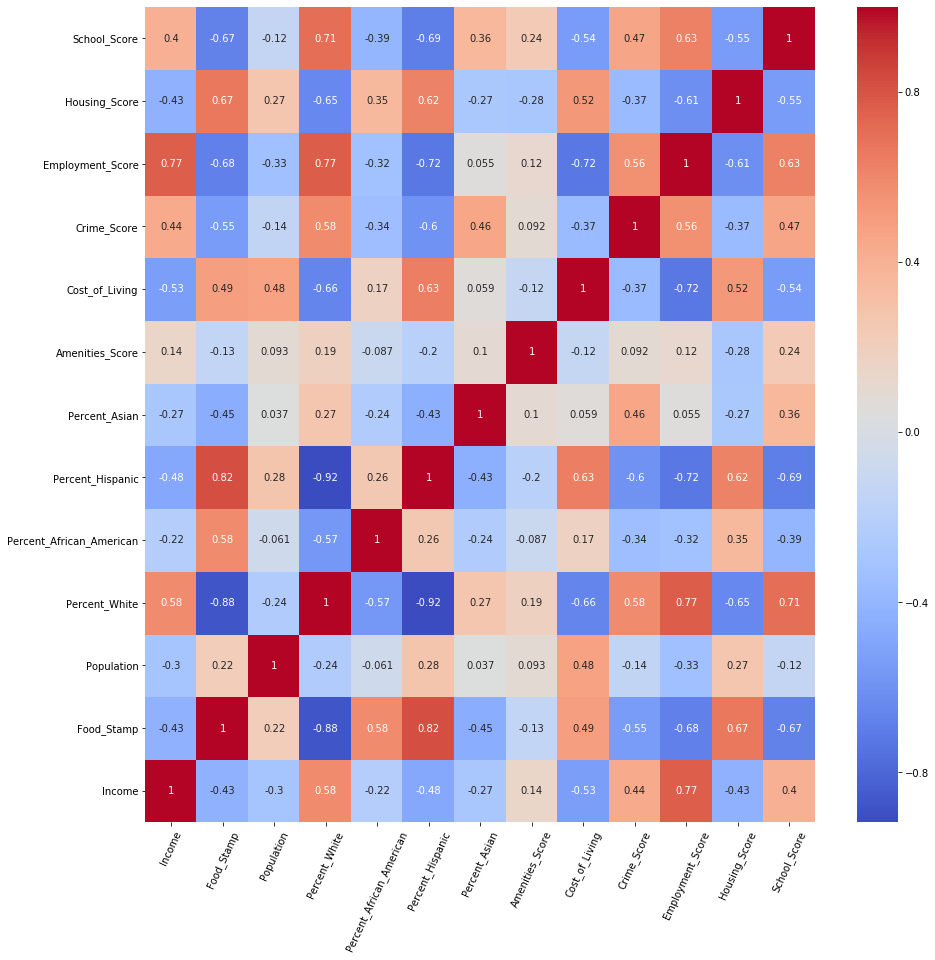

In [15]:
#Find Correlations within data and plotting them on heat map
corr_matric = livability_feature_scaler.corr()
plt.subplots(figsize=(15,15))
ax = sn.heatmap(corr_matric, annot=True, cmap="coolwarm")
ax.set_ylim(0,13)
plt.xticks(rotation=65)
plt.show()


## Decision Tree Classifier

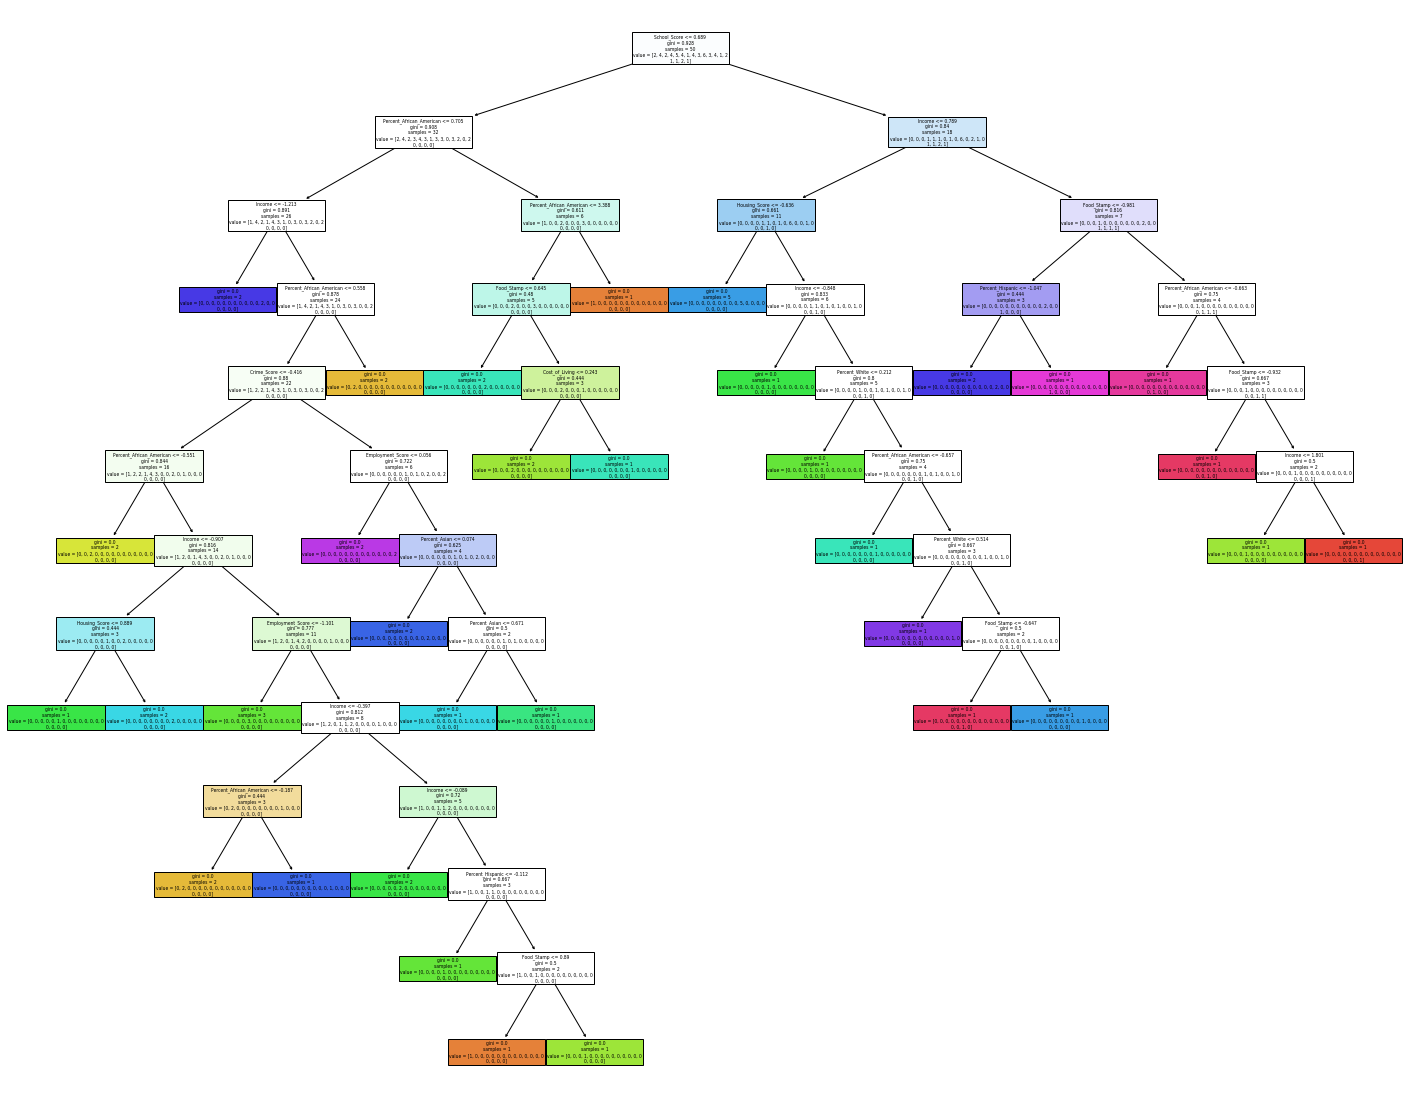

Accuracy Score
100.0


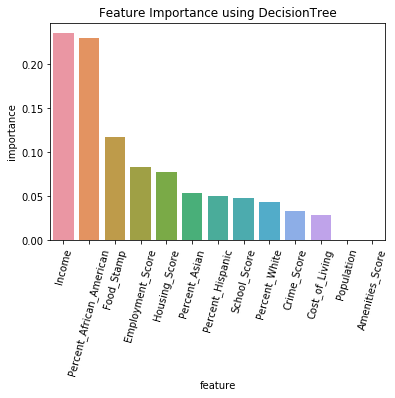

In [9]:
clf = tree.DecisionTreeClassifier(random_state=66)

clf = clf.fit(livability_feature_scaler,livability_target)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=livability_feature_scaler.columns,  
                   filled=True)
plt.show()
livability_pred = clf.predict(livability_feature_scaler)
from sklearn.metrics import accuracy_score
print("Accuracy Score")
score = accuracy_score(livability_target,livability_pred)
print(score * 100)
feats = []
for feature, importance in zip(livability_feature_scaler.columns, clf.feature_importances_):
    feats.append([feature, importance])
sorted_importances = sorted(feats,key=lambda i:i[1], reverse=True)
sorted_importances= pd.DataFrame(np.array(sorted_importances), columns=['feature','importance'])
sorted_importances['importance'] = pd.to_numeric(sorted_importances['importance'])
sn.barplot(sorted_importances['feature'],sorted_importances['importance'])
plt.title('Feature Importance using DecisionTree')
plt.xticks(rotation=75)
plt.show()

## Extra Tree Classifier

/Users/keeshanpatel/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/keeshanpatel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


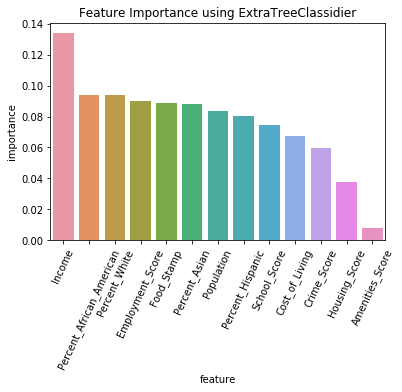

In [10]:
#Feature Selection using importance from model
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=56)
model.fit(livability_feature_scaler, livability_target)
# display the relative importance of each attribute

feats = [] # a dict to hold feature_name: feature_importance
for feature, importance in zip(livability_feature_scaler.columns, model.feature_importances_):
    feats.append([feature, importance]) #add the name/value pair 

sorted_importances = sorted(feats,key=lambda i:i[1], reverse=True)
sorted_importances= pd.DataFrame(np.array(sorted_importances), columns=['feature','importance'])
sorted_importances['importance'] = pd.to_numeric(sorted_importances['importance'])
sn.barplot(sorted_importances['feature'],sorted_importances['importance'])
plt.title('Feature Importance using ExtraTreeClassidier')
plt.xticks(rotation=65)
plt.show()


## Regressor Decision Tree

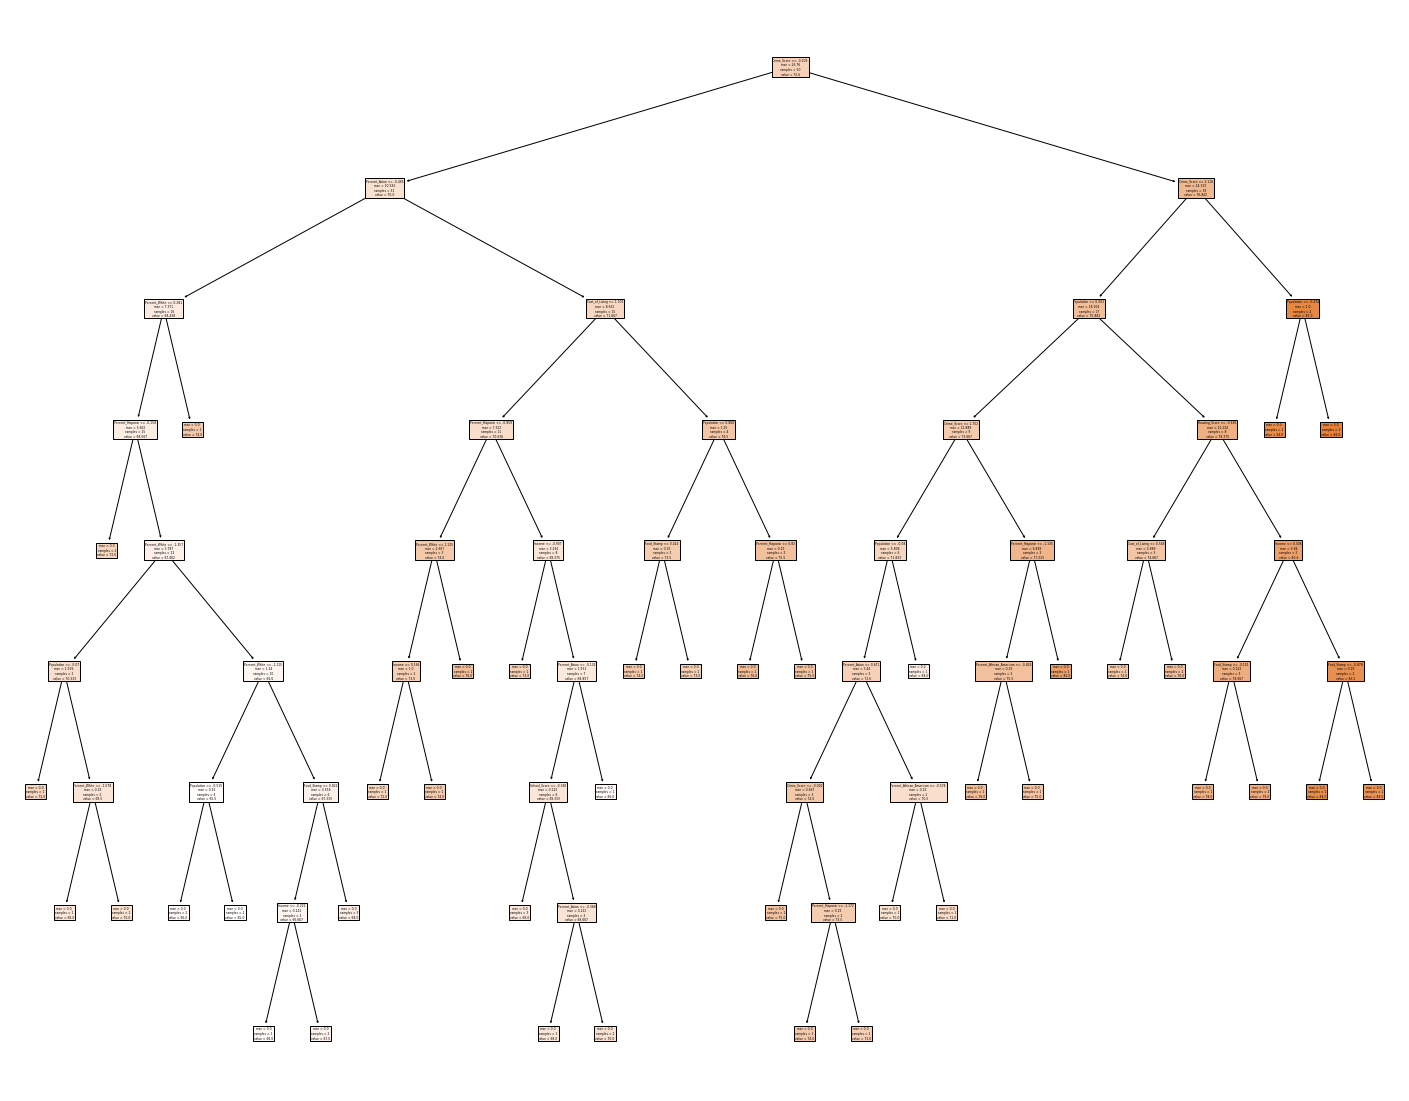

1.0

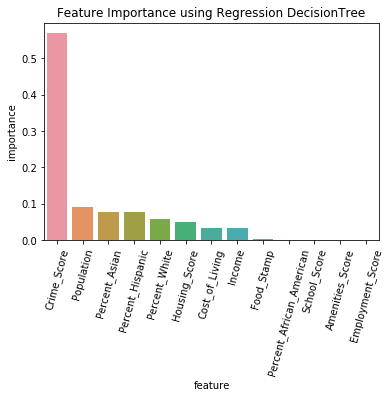

In [11]:
clf = tree.DecisionTreeRegressor(random_state=50)

clf = clf.fit(livability_feature_scaler,livability_target)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=livability_feature_scaler.columns,  
                   filled=True)
plt.show()
livability_pred = clf.predict(livability_feature_scaler)
from sklearn.metrics import accuracy_score
display(accuracy_score(livability_target,livability_pred))

feats = []
for feature, importance in zip(livability_feature_scaler.columns, clf.feature_importances_):
    feats.append([feature, importance])
sorted_importances = sorted(feats,key=lambda i:i[1], reverse=True)
sorted_importances= pd.DataFrame(np.array(sorted_importances), columns=['feature','importance'])
sorted_importances['importance'] = pd.to_numeric(sorted_importances['importance'])
sn.barplot(sorted_importances['feature'],sorted_importances['importance'])
plt.title('Feature Importance using Regression DecisionTree')
plt.xticks(rotation=75)
plt.show()

## Multiple Regression


In [12]:
livability_data = pd.read_csv('Regression_python_Areavibes.csv')


In [13]:
display(livability_data.head())
display(livability_data.info())
display(livability_data.describe())

,Neighboorhood,Median Household Income ($K),Food Stamp Percentage by Houshold,Population,Percent White,Percent African American,Percent Hispanic,Percent Asian,Equal_Diversity,Equal Diveristy Score,...,Transit Score,Bike Score,Amenities Score,Cost of Living Score,Crime Score,Employment Score,Housing Score,School Score,Raw Livability,Livability
0,UNIVERSITY OF TEXAS,7.0,5.3,7246,0.448109,0.064035,0.232128,0.222192,0.158033,84.196744,...,72,91,100,48.0,72.0,57.0,48.0,100,70.833333,74
1,GATEWAY,70.7,2.8,1121,0.595004,0.042819,0.145406,0.196253,0.276406,72.359400,...,40,61,100,53.0,100.0,69.0,48.0,100,78.333333,84
2,WEST UNIVERSITY,10.6,3.3,16408,0.627438,0.019381,0.130912,0.192650,0.257690,74.231029,...,63,94,100,78.0,57.0,48.0,48.0,81,68.666667,76
3,NORTH BURNETT,58.6,3.4,4472,0.460644,0.095036,0.255814,0.156977,0.183907,81.609261,...,39,63,100,72.0,48.0,66.0,48.0,100,72.333333,74
4,HANCOCK,51.2,2.9,4662,0.698198,0.020163,0.123338,0.123981,0.412327,58.767316,...,59,89,100,48.0,48.0,66.0,52.5,100,69.083333,72


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 25 columns):
Neighboorhood                        50 non-null object
Median Household Income ($K)         50 non-null float64
Food Stamp Percentage by Houshold    50 non-null float64
 Population                          50 non-null int64
Percent White                        50 non-null float64
Percent African American             50 non-null float64
Percent Hispanic                     50 non-null float64
Percent Asian                        50 non-null float64
Equal_Diversity                      50 non-null float64
Equal Diveristy Score                50 non-null float64
US_Diversity                         50 non-null float64
Us Diveristy Score                   50 non-null float64
Austin_Diversity                     50 non-null float64
Austin Diveristy Score               50 non-null float64
Walk Score                           50 non-null int64
Transit Score                        50 non-nul

None

,Median Household Income ($K),Food Stamp Percentage by Houshold,Population,Percent White,Percent African American,Percent Hispanic,Percent Asian,Equal_Diversity,Equal Diveristy Score,US_Diversity,...,Transit Score,Bike Score,Amenities Score,Cost of Living Score,Crime Score,Employment Score,Housing Score,School Score,Raw Livability,Livability
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,53.756000,12.588000,6572.200000,0.475347,0.086502,0.373824,0.043219,0.278135,72.186531,0.227363,...,47.120000,68.920000,99.620000,57.600000,55.190000,61.130000,55.570000,80.820000,68.321667,72.600000
std,21.623977,10.280964,4676.076648,0.249178,0.096700,0.230295,0.051645,0.097811,9.781130,0.089340,...,8.331499,17.160515,2.687006,9.985193,11.593845,10.419668,8.443697,16.051817,3.988824,5.225526
min,7.000000,0.400000,1121.000000,0.079104,0.003350,0.054606,0.004244,0.105809,48.320219,0.070718,...,31.000000,34.000000,81.000000,48.000000,48.000000,48.000000,48.000000,48.000000,62.000000,65.000000
25%,41.825000,3.425000,4023.500000,0.242808,0.025096,0.146551,0.014530,0.198315,66.764495,0.150261,...,41.250000,56.000000,100.000000,48.000000,48.000000,53.000000,48.000000,69.000000,65.229167,69.000000
50%,51.900000,9.550000,5320.500000,0.491684,0.049072,0.366790,0.024428,0.254702,74.529773,0.213972,...,46.000000,67.000000,100.000000,55.000000,48.000000,60.000000,52.500000,78.000000,68.083333,72.000000
75%,61.575000,21.550000,7446.250000,0.711476,0.103551,0.531518,0.039263,0.332355,80.168546,0.304193,...,51.000000,84.000000,100.000000,66.000000,59.250000,66.000000,60.000000,100.000000,70.291667,75.000000
max,123.100000,40.200000,27911.000000,0.908543,0.459437,0.827790,0.222192,0.516798,89.419099,0.396740,...,72.000000,94.000000,100.000000,78.000000,100.000000,100.000000,75.000000,100.000000,79.500000,86.000000


## Normalize Data

In [29]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

livability_features = livability_data.drop("Livability",axis=1)
livability_features = livability_features.drop("Neighboorhood",axis=1)
livability_features = livability_features.drop("Raw Livability",axis=1)

livability_features = livability_features.drop("Equal_Diversity",axis=1)
livability_features = livability_features.drop("Equal Diveristy Score",axis=1)
livability_features = livability_features.drop("US_Diversity",axis=1)
livability_features = livability_features.drop("Us Diveristy Score",axis=1)
livability_features = livability_features.drop("Austin_Diversity",axis=1)
livability_features = livability_features.drop("Austin Diveristy Score",axis=1)


livability_target = livability_data[["Livability"]]

scaler.fit(livability_features)
livability_feature_scaler = scaler.transform(livability_features)
livability_feature_scaler = pd.DataFrame(livability_feature_scaler, index=livability_features.index, columns=livability_features.columns)

display(livability_feature_scaler.info())
display(livability_feature_scaler.head())
display(livability_target.info())
display(livability_target.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
Median Household Income ($K)         50 non-null float64
Food Stamp Percentage by Houshold    50 non-null float64
 Population                          50 non-null float64
Percent White                        50 non-null float64
Percent African American             50 non-null float64
Percent Hispanic                     50 non-null float64
Percent Asian                        50 non-null float64
Walk Score                           50 non-null float64
Transit Score                        50 non-null float64
Bike Score                           50 non-null float64
Amenities Score                      50 non-null float64
Cost of Living Score                 50 non-null float64
Crime Score                          50 non-null float64
Employment Score                     50 non-null float64
Housing Score                        50 non-null float64
School Score                         50 no

None

,Median Household Income ($K),Food Stamp Percentage by Houshold,Population,Percent White,Percent African American,Percent Hispanic,Percent Asian,Walk Score,Transit Score,Bike Score,Amenities Score,Cost of Living Score,Crime Score,Employment Score,Housing Score,School Score
0,-2.184182,-0.716080,0.145558,-0.110419,-0.234692,-0.621527,3.500630,1.611817,3.016575,1.299738,0.142857,-0.971184,1.464627,-0.400390,-0.905629,1.207011
1,0.791530,-0.961717,-1.177599,0.485086,-0.456325,-1.001920,2.993289,-0.383878,-0.863264,-0.466210,0.142857,-0.465359,3.904221,0.762971,-0.905629,1.207011
2,-2.016009,-0.912589,2.124785,0.616569,-0.701167,-1.065496,2.922808,1.905301,1.925370,1.476333,0.142857,2.063767,0.157702,-1.272910,-0.905629,0.011328
3,0.226285,-0.902764,-0.453697,-0.059604,0.089148,-0.517632,2.225055,-0.853453,-0.984509,-0.348480,0.142857,1.456777,-0.626453,0.472130,-0.905629,1.207011
4,-0.119402,-0.951891,-0.412652,0.903428,-0.692995,-1.098719,1.579674,1.142241,1.440391,1.182008,0.142857,-0.971184,-0.626453,0.472130,-0.367276,1.207011


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
Livability    50 non-null int64
dtypes: int64(1)
memory usage: 528.0 bytes


None

,Livability
0,74
1,84
2,76
3,74
4,72


In [30]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression(normalize=True).fit(livability_feature_scaler, livability_target)
display(reg.score(livability_feature_scaler, livability_target))
display(reg.coef_)

0.7061074365509845

array([[-0.37846515, -0.13503567,  0.97049999,  8.73831542,  3.66989914,
         8.6470394 ,  1.82267157, -2.00103792,  0.01896148,  2.0773724 ,
         0.42099637,  1.77561661,  2.39013539,  3.24605828,  1.18361844,
         2.0277606 ]])

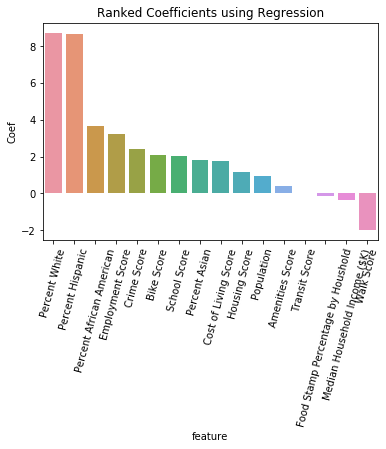

In [31]:
feats = []
for feature, importance in zip(livability_feature_scaler.columns, reg.coef_[0]):
    feats.append([feature, importance])
sorted_importances = sorted(feats,key=lambda i:i[1], reverse=True)
sorted_importances= pd.DataFrame(np.array(sorted_importances), columns=['feature','Coef'])
sorted_importances['Coef'] = pd.to_numeric(sorted_importances['Coef'])
sn.barplot(sorted_importances['feature'],sorted_importances['Coef'])
plt.title('Ranked Coefficients using Regression')
plt.xticks(rotation=75)
plt.show()

## Raw Livaility

In [17]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

livability_features = livability_data.drop("Livability",axis=1)
livability_features = livability_features.drop("Neighboorhood",axis=1)
livability_features = livability_features.drop("Raw Livability",axis=1)

livability_features = livability_features.drop("Equal_Diversity",axis=1)
livability_features = livability_features.drop("Equal Diveristy Score",axis=1)
livability_features = livability_features.drop("US_Diversity",axis=1)
livability_features = livability_features.drop("Us Diveristy Score",axis=1)
livability_features = livability_features.drop("Austin_Diversity",axis=1)


livability_target = livability_data[["Livability"]]

scaler.fit(livability_features)
livability_feature_scaler = scaler.transform(livability_features)
livability_feature_scaler = pd.DataFrame(livability_feature_scaler, index=livability_features.index, columns=livability_features.columns)

display(livability_feature_scaler.info())
display(livability_feature_scaler.head())
display(livability_target.info())
display(livability_target.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
Median Household Income ($K)         50 non-null float64
Food Stamp Percentage by Houshold    50 non-null float64
 Population                          50 non-null float64
Percent White                        50 non-null float64
Percent African American             50 non-null float64
Percent Hispanic                     50 non-null float64
Percent Asian                        50 non-null float64
Austin Diveristy Score               50 non-null float64
Walk Score                           50 non-null float64
Transit Score                        50 non-null float64
Bike Score                           50 non-null float64
Amenities Score                      50 non-null float64
Cost of Living Score                 50 non-null float64
Crime Score                          50 non-null float64
Employment Score                     50 non-null float64
Housing Score                        50 no

None

,Median Household Income ($K),Food Stamp Percentage by Houshold,Population,Percent White,Percent African American,Percent Hispanic,Percent Asian,Austin Diveristy Score,Walk Score,Transit Score,Bike Score,Amenities Score,Cost of Living Score,Crime Score,Employment Score,Housing Score,School Score
0,-2.184182,-0.716080,0.145558,-0.110419,-0.234692,-0.621527,3.500630,1.375608,1.611817,3.016575,1.299738,0.142857,-0.971184,1.464627,-0.400390,-0.905629,1.207011
1,0.791530,-0.961717,-1.177599,0.485086,-0.456325,-1.001920,2.993289,-0.486707,-0.383878,-0.863264,-0.466210,0.142857,-0.465359,3.904221,0.762971,-0.905629,1.207011
2,-2.016009,-0.912589,2.124785,0.616569,-0.701167,-1.065496,2.922808,0.759269,1.905301,1.925370,1.476333,0.142857,2.063767,0.157702,-1.272910,-0.905629,0.011328
3,0.226285,-0.902764,-0.453697,-0.059604,0.089148,-0.517632,2.225055,1.191238,-0.853453,-0.984509,-0.348480,0.142857,1.456777,-0.626453,0.472130,-0.905629,1.207011
4,-0.119402,-0.951891,-0.412652,0.903428,-0.692995,-1.098719,1.579674,-1.177503,1.142241,1.440391,1.182008,0.142857,-0.971184,-0.626453,0.472130,-0.367276,1.207011


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
Livability    50 non-null int64
dtypes: int64(1)
memory usage: 528.0 bytes


None

,Livability
0,74
1,84
2,76
3,74
4,72


In [18]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression(normalize=True).fit(livability_feature_scaler, livability_target)
display(reg.score(livability_feature_scaler, livability_target))
display(reg.coef_)

0.7098211967988775

array([[-0.15693878,  0.22682646,  1.03142478, 11.96528587,  4.86317232,
        11.42198863,  2.47164079,  0.45951841, -2.08751731,  0.08621546,
         2.11278405,  0.35502532,  1.87187796,  2.51395861,  3.32842723,
         1.1806143 ,  2.10063456]])

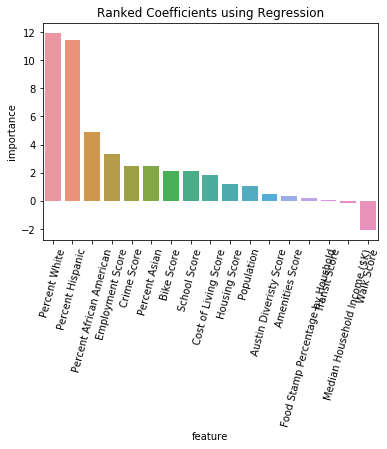

In [19]:
feats = []
for feature, importance in zip(livability_feature_scaler.columns, reg.coef_[0]):
    feats.append([feature, importance])
sorted_importances = sorted(feats,key=lambda i:i[1], reverse=True)
sorted_importances= pd.DataFrame(np.array(sorted_importances), columns=['feature','Coef'])
sorted_importances['Coef'] = pd.to_numeric(sorted_importances['Coef'])
sn.barplot(sorted_importances['feature'],sorted_importances['Coef'])
plt.title('Ranked Coefficients using Regression')
plt.xticks(rotation=75)
plt.show()

## Get P value of Regression

In [26]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

livability_features = livability_data.drop("Livability",axis=1)
livability_features = livability_features.drop("Neighboorhood",axis=1)
livability_features = livability_features.drop("Raw Livability",axis=1)

livability_features = livability_features.drop("Equal_Diversity",axis=1)
livability_features = livability_features.drop("Equal Diveristy Score",axis=1)
livability_features = livability_features.drop("US_Diversity",axis=1)
livability_features = livability_features.drop("Us Diveristy Score",axis=1)
livability_features = livability_features.drop("Austin_Diversity",axis=1)
livability_features = livability_features.drop("Austin Diveristy Score",axis=1)


livability_target = livability_data[["Livability"]]

scaler.fit(livability_features)
livability_feature_scaler = scaler.transform(livability_features)
livability_feature_scaler = pd.DataFrame(livability_feature_scaler, index=livability_features.index, columns=livability_features.columns)

display(livability_feature_scaler.info())
display(livability_feature_scaler.head())
display(livability_target.info())
display(livability_target.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
Median Household Income ($K)         50 non-null float64
Food Stamp Percentage by Houshold    50 non-null float64
 Population                          50 non-null float64
Percent White                        50 non-null float64
Percent African American             50 non-null float64
Percent Hispanic                     50 non-null float64
Percent Asian                        50 non-null float64
Walk Score                           50 non-null float64
Transit Score                        50 non-null float64
Bike Score                           50 non-null float64
Amenities Score                      50 non-null float64
Cost of Living Score                 50 non-null float64
Crime Score                          50 non-null float64
Employment Score                     50 non-null float64
Housing Score                        50 non-null float64
School Score                         50 no

None

,Median Household Income ($K),Food Stamp Percentage by Houshold,Population,Percent White,Percent African American,Percent Hispanic,Percent Asian,Walk Score,Transit Score,Bike Score,Amenities Score,Cost of Living Score,Crime Score,Employment Score,Housing Score,School Score
0,-2.184182,-0.716080,0.145558,-0.110419,-0.234692,-0.621527,3.500630,1.611817,3.016575,1.299738,0.142857,-0.971184,1.464627,-0.400390,-0.905629,1.207011
1,0.791530,-0.961717,-1.177599,0.485086,-0.456325,-1.001920,2.993289,-0.383878,-0.863264,-0.466210,0.142857,-0.465359,3.904221,0.762971,-0.905629,1.207011
2,-2.016009,-0.912589,2.124785,0.616569,-0.701167,-1.065496,2.922808,1.905301,1.925370,1.476333,0.142857,2.063767,0.157702,-1.272910,-0.905629,0.011328
3,0.226285,-0.902764,-0.453697,-0.059604,0.089148,-0.517632,2.225055,-0.853453,-0.984509,-0.348480,0.142857,1.456777,-0.626453,0.472130,-0.905629,1.207011
4,-0.119402,-0.951891,-0.412652,0.903428,-0.692995,-1.098719,1.579674,1.142241,1.440391,1.182008,0.142857,-0.971184,-0.626453,0.472130,-0.367276,1.207011


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
Livability    50 non-null int64
dtypes: int64(1)
memory usage: 528.0 bytes


None

,Livability
0,74
1,84
2,76
3,74
4,72


In [28]:
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(livability_feature_scaler)
est = sm.OLS(livability_target, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             Livability   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     4.955
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           5.11e-05
Time:                        02:09:40   Log-Likelihood:                -122.51
No. Observations:                  50   AIC:                             279.0
Df Residuals:                      33   BIC:                             311.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

/Users/keeshanpatel/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Get P value of regression with only area vibes scores

In [60]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#display(livability_features)
livability_features = livability_data.drop("Livability",axis=1)
livability_features = livability_features[["Amenities_Score","Cost_of_Living","Crime_Score","Employment_Score","Housing_Score","School_Score"]]


livability_target = livability_data[["Livability"]]

scaler.fit(livability_features)
livability_feature_scaler = scaler.transform(livability_features)
livability_feature_scaler = pd.DataFrame(livability_feature_scaler, index=livability_features.index, columns=livability_features.columns)

display(livability_feature_scaler.info())
display(livability_feature_scaler.head())
display(livability_target.info())
display(livability_target.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
Amenities_Score     50 non-null float64
Cost_of_Living      50 non-null float64
Crime_Score         50 non-null float64
Employment_Score    50 non-null float64
Housing_Score       50 non-null float64
School_Score        50 non-null float64
dtypes: float64(6)
memory usage: 2.5 KB


None

,Amenities_Score,Cost_of_Living,Crime_Score,Employment_Score,Housing_Score,School_Score
0,0.142857,-0.971184,1.563735,-0.407149,-0.905629,1.115296
1,0.142857,2.063767,0.182344,-1.332487,-0.905629,0.262996
2,0.142857,0.242796,1.563735,-0.869818,1.247782,1.115296
3,0.142857,2.063767,-0.646491,-1.332487,1.606683,-1.441606
4,0.142857,1.760272,-0.646491,-1.332487,0.529978,-0.711062


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
Livability    50 non-null int64
dtypes: int64(1)
memory usage: 528.0 bytes


None

,Livability
0,74
1,76
2,70
3,76
4,70


In [61]:
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(livability_feature_scaler)
est = sm.OLS(livability_target, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             Livability   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     13.63
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.34e-08
Time:                        20:11:18   Log-Likelihood:                -126.49
No. Observations:                  50   AIC:                             267.0
Df Residuals:                      43   BIC:                             280.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               72.6000      0.463  

/Users/keeshanpatel/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Analysis of Final Data

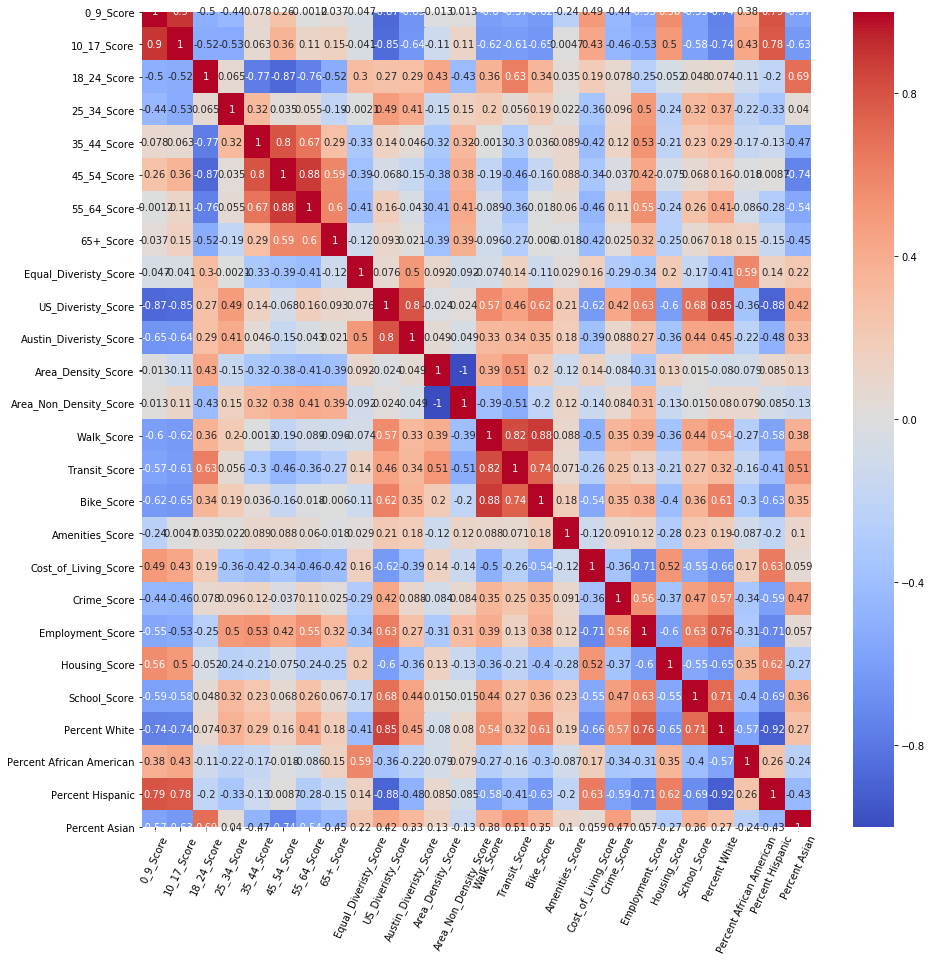

In [9]:
livability_data = pd.read_csv('ground_truth.csv')
#Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

livability_features = livability_data.drop("Neighboorhood",axis=1)


scaler.fit(livability_features)
livability_feature_scaler = scaler.transform(livability_features)
livability_feature_scaler = pd.DataFrame(livability_feature_scaler, index=livability_features.index, columns=livability_features.columns)



#Find Correlations within data and plotting them on heat map
corr_matric = livability_feature_scaler.corr()
plt.subplots(figsize=(15,15))
ax = sn.heatmap(corr_matric, annot=True, cmap="coolwarm")
#ax.set_ylim(0,13)
plt.xticks(rotation=65)
plt.show()
